In [1]:
import graphlab

In [2]:
import pandas as pd
import numpy as np

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
house_data_train = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
house_data_test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
house_data_valid = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)

In [4]:
import time
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            #print 'name' + name
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = poly_dataframe['power_1'].apply(lambda x: x**power)
            #print poly_dataframe.head()
            #time.sleep(10)
    return poly_dataframe

In [5]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living', 'price'])

C:\Users\Dhaval-PC\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [6]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)

In [7]:
poly1_data.head()

,power_1
19452,290.0
15381,370.0
860,380.0
18379,384.0
4868,390.0


In [8]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


In [9]:
poly1_data['price']=sales['price']

In [10]:
poly1_data.head()

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0


In [11]:
model1 = graphlab.linear_regression.create(graphlab.SFrame(poly1_data), features=['power_1'], target='price', validation_set=None)

This non-commercial license of GraphLab Create for academic use is assigned to dhavalp576@gmail.com and will expire on May 27, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\DHAVAL~1\AppData\Local\Temp\graphlab_server_1496517693.log.0


Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.035577     | 4362074.683616     | 261440.790302 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [12]:
model1.coefficients

name,index,value,stderr
(intercept),None,-43579.0880188,4402.68969032
power_1,None,280.62277215,1.93639855201


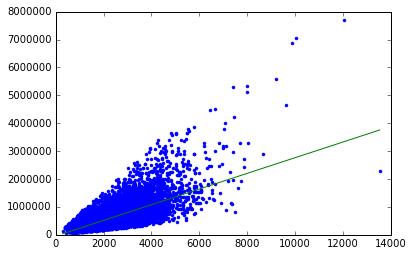

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'], poly1_data['price'], '.'
    , poly1_data['power_1'], model1.predict(graphlab.SFrame(poly1_data)),'-')

In [14]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price']=sales['price']
model2 = graphlab.linear_regression.create(graphlab.SFrame(poly2_data), features=['power_1','power_2'], target='price', validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.011025     | 5913021.143248     | 250948.367620 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [15]:
model2.coefficients

name,index,value,stderr
(intercept),None,199222.501593,7058.00480351
power_1,None,67.9940583997,5.28787198918
power_2,None,0.0385812325367,0.000898246542959


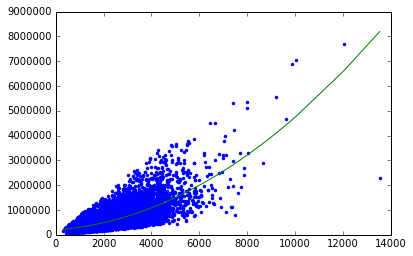

In [16]:
plt.plot(poly2_data['power_1'], poly2_data['price'], '.'
    , poly2_data['power_1'], model2.predict(graphlab.SFrame(poly2_data)),'-')

In [17]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price']=sales['price']
model3 = graphlab.linear_regression.create(graphlab.SFrame(poly3_data), features=['power_1','power_2','power_3'], target='price', validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.012531     | 3261066.776472     | 249261.285049 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

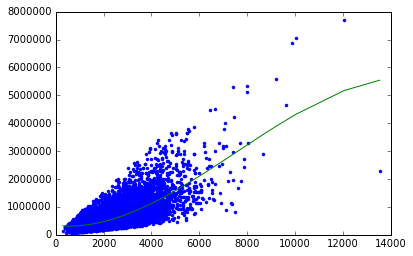

In [18]:
plt.plot(poly3_data['power_1'], poly3_data['price'], '.'
    , poly3_data['power_1'], model3.predict(graphlab.SFrame(poly3_data)),'-')

In [19]:
model3.coefficients

name,index,value,stderr
(intercept),None,336788.129248,10661.0153158
power_1,None,-90.1476363479,10.6222891291
power_2,None,0.0870367185044,0.00296630621605
power_3,None,-3.83985229122e-06,2.24174908423e-07


Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.020552     | 2662308.516242     | 245690.510025 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

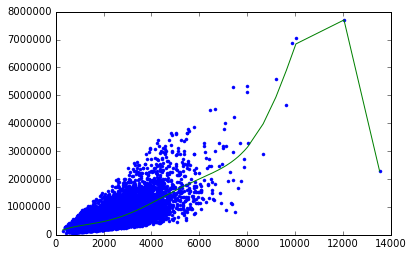

In [20]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price']=sales['price']
model15 = graphlab.linear_regression.create(graphlab.SFrame(poly15_data), features=['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], target='price', validation_set=None)
plt.plot(poly15_data['power_1'], poly15_data['price'], '.'
    , poly15_data['power_1'], model15.predict(graphlab.SFrame(poly15_data)),'-')

In [21]:
model15.coefficients

name,index,value,stderr
(intercept),None,73619.755265,nan
power_1,None,410.287449421,nan
power_2,None,-0.230450698501,nan
power_3,None,7.58840468747e-05,nan
power_4,None,-5.65701683626e-09,nan
power_5,None,-4.57028136492e-13,nan
power_6,None,2.66360130054e-17,nan
power_7,None,3.38584743908e-21,nan
power_8,None,1.147231256e-25,nan
power_9,None,-4.65293308988e-30,nan


In [51]:
house_data_set1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
house_data_set2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
house_data_set3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
house_data_set4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.013035     | 2195218.943528     | 248858.820532 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

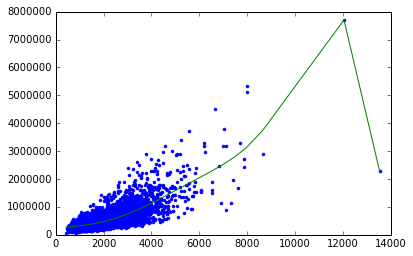

In [23]:
poly15_data1 = polynomial_dataframe(house_data_set1['sqft_living'], 15)
poly15_data1['price']=house_data_set1['price']
model15_set1 = graphlab.linear_regression.create(graphlab.SFrame(poly15_data1), features=['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], target='price', validation_set=None)
plt.plot(poly15_data1['power_1'], poly15_data1['price'], '.'
    , poly15_data1['power_1'], model15_set1.predict(graphlab.SFrame(poly15_data1)),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.013023     | 2069212.549945     | 234840.065795 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

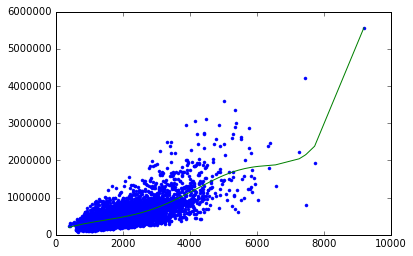

In [24]:
poly15_data2 = polynomial_dataframe(house_data_set2['sqft_living'], 15)
poly15_data2['price']=house_data_set2['price']
model15_set2 = graphlab.linear_regression.create(graphlab.SFrame(poly15_data2), features=['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], target='price', validation_set=None)
plt.plot(poly15_data2['power_1'], poly15_data2['price'], '.'
    , poly15_data2['power_1'], model15_set2.predict(graphlab.SFrame(poly15_data2)),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.016544     | 2269769.479990     | 251460.072519 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

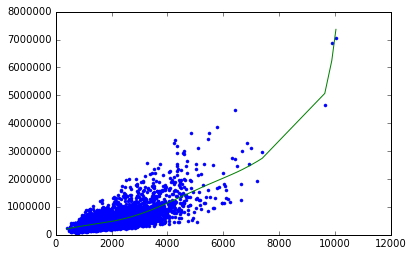

In [25]:
poly15_data3 = polynomial_dataframe(house_data_set3['sqft_living'], 15)
poly15_data3['price']=house_data_set3['price']
model15_set3 = graphlab.linear_regression.create(graphlab.SFrame(poly15_data3), features=['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], target='price', validation_set=None)
plt.plot(poly15_data3['power_1'], poly15_data3['price'], '.'
    , poly15_data3['power_1'], model15_set3.predict(graphlab.SFrame(poly15_data3)),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.010027     | 2314893.166126     | 244563.136729 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

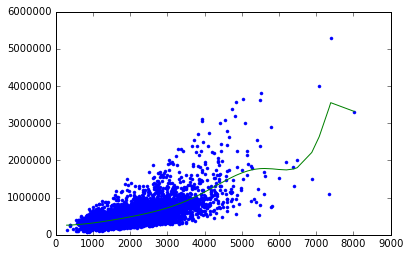

In [26]:
poly15_data4 = polynomial_dataframe(house_data_set4['sqft_living'], 15)
poly15_data4['price']=house_data_set4['price']
model15_set4 = graphlab.linear_regression.create(graphlab.SFrame(poly15_data4), features=['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], target='price', validation_set=None)
plt.plot(poly15_data4['power_1'], poly15_data4['price'], '.'
    , poly15_data4['power_1'], model15_set4.predict(graphlab.SFrame(poly15_data4)),'-')

In [27]:
model15_set1.coefficients.print_rows(num_rows=16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   223312.732878    |   835599.657528   |
|   power_1   |  None |   118.086165761    |   3486.76165452   |
|   power_2   |  None |  -0.0473482277806  |   5.85700989908   |
|   power_3   |  None | 3.25310410405e-05  |  0.00510891362324 |
|   power_4   |  None | -3.32372194409e-09 | 2.39840455845e-06 |
|   power_5   |  None | -9.75830839815e-14 | 3.43833696425e-10 |
|   power_6   |  None |  1.1544031463e-17  |        nan        |
|   power_7   |  None | 1.05145893059e-21  |        nan        |
|   power_8   |  None | 3.46049744229e-26  |        nan        |
|   power_9   |  None | -1.0965444628e-30  | 3.72369278975e-25 |
|   power_10  |  None | -2.42031861097e-34 |        nan        |
|   power_11  |  None | -1.99601260973e-38 |        nan        |
|   power_12  |  None | -

In [28]:
model15_set2.coefficients.print_rows(num_rows=16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   89836.5019491    |   1677961.18017   |
|   power_1   |  None |   319.806983552    |    9997.901863    |
|   power_2   |  None |  -0.103315446664   |   25.2922348437   |
|   power_3   |  None | 1.06682695435e-05  |  0.0358798004936  |
|   power_4   |  None | 5.75576906968e-09  | 3.18207876918e-05 |
|   power_5   |  None | -2.54663993385e-13 | 1.86083382548e-08 |
|   power_6   |  None | -1.09641329346e-16 | 7.35876523444e-12 |
|   power_7   |  None | -6.3645753191e-21  | 1.97896849382e-15 |
|   power_8   |  None | 5.52561316305e-25  | 3.56555715696e-19 |
|   power_9   |  None | 1.35082056691e-28  |  3.9887602843e-23 |
|   power_10  |  None | 1.18408109982e-32  |        nan        |
|   power_11  |  None | 1.98346497642e-37  |        nan        |
|   power_12  |  None | -

In [29]:
model15_set3.coefficients.print_rows(num_rows=16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |    87317.969362    |        nan        |
|   power_1   |  None |   356.304919941    |        nan        |
|   power_2   |  None |  -0.164817436261   |        nan        |
|   power_3   |  None | 4.40424924064e-05  |        nan        |
|   power_4   |  None | 6.48236113128e-10  |        nan        |
|   power_5   |  None | -6.75253168835e-13 |        nan        |
|   power_6   |  None | -3.3684270523e-17  |        nan        |
|   power_7   |  None | 3.60999571802e-21  |        nan        |
|   power_8   |  None | 6.46999689273e-25  |        nan        |
|   power_9   |  None |  4.2363945149e-29  |        nan        |
|   power_10  |  None | -3.62148411126e-34 |        nan        |
|   power_11  |  None | -4.27119449428e-37 |        nan        |
|   power_12  |  None | -

In [30]:
model15_set4.coefficients.print_rows(num_rows=16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   259020.861912    |   1418633.01562   |
|   power_1   |  None |   -31.7276775684   |   8986.43219511   |
|   power_2   |  None |   0.109702744502   |   23.6372626981   |
|   power_3   |  None | -1.58383808272e-05 |  0.0340870703679  |
|   power_4   |  None | -4.47660531389e-09 | 2.99226779099e-05 |
|   power_5   |  None | 1.13976557616e-12  | 1.65942118367e-08 |
|   power_6   |  None | 1.97669093093e-16  | 5.64257457407e-12 |
|   power_7   |  None | -6.15783627937e-21 | 8.28262236036e-16 |
|   power_8   |  None | -4.88012254182e-24 |        nan        |
|   power_9   |  None | -6.62186721658e-28 |        nan        |
|   power_10  |  None | -2.70631566994e-32 | 5.03468199011e-27 |
|   power_11  |  None | 6.72370351218e-36  | 8.34356427862e-31 |
|   power_12  |  None | 1

In [34]:
for power in range(1,16):
    name_df = 'poly_data_degree_' + str(power)
    name_model = 'model_degree_' + str(power)
    predicted_value = 'predicated_value_degree_' + str(power)
    rss = 'RSS_degree_' + str(power)
    name_df = polynomial_dataframe(house_data_train['sqft_living'], power)
    name_df_val = polynomial_dataframe(house_data_valid['sqft_living'], power)
    feature_columns = list(name_df)
    name_df['price']=house_data_train['price']
    name_df_val['price']=house_data_valid['price']
    name_model = graphlab.linear_regression.create(graphlab.SFrame(name_df), features=feature_columns, target='price', validation_set=None, verbose=False)
    predicted_value = name_model.predict(graphlab.SFrame(name_df_val))
    rss = np.sum((name_df_val['price'] - predicted_value)**2)
    print 'RSS of the degree of polynomial: ' 
    print power
    print rss

RSS of the degree of polynomial: 
1
6.29097403641e+14
RSS of the degree of polynomial: 
2
6.23953237538e+14
RSS of the degree of polynomial: 
3
6.25827577985e+14
RSS of the degree of polynomial: 
4
6.29941752786e+14
RSS of the degree of polynomial: 
5
6.2091795108e+14
RSS of the degree of polynomial: 
6
5.63138374474e+14
RSS of the degree of polynomial: 
7
6.61891167866e+14
RSS of the degree of polynomial: 
8
9.31498596903e+14
RSS of the degree of polynomial: 
9
1.29127778078e+15
RSS of the degree of polynomial: 
10
1.56881674242e+15
RSS of the degree of polynomial: 
11
1.54825228882e+15
RSS of the degree of polynomial: 
12
1.14515731248e+15
RSS of the degree of polynomial: 
13
6.26265567305e+14
RSS of the degree of polynomial: 
14
9.30708913159e+14
RSS of the degree of polynomial: 
15
4.14434121034e+15


Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 7

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.026070     | 2469114.335231     | 246015.046477 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

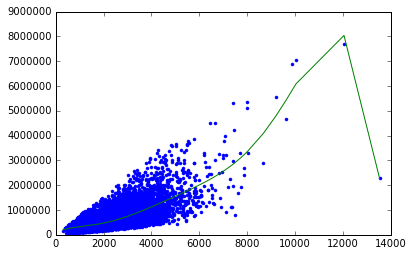

In [35]:
poly6_data = polynomial_dataframe(sales['sqft_living'], 6)
feature_list = list(poly6_data)
poly6_data['price']=sales['price']
model6 = graphlab.linear_regression.create(graphlab.SFrame(poly6_data), features=feature_list, target='price', validation_set=None)
plt.plot(poly6_data['power_1'], poly6_data['price'], '.'
    , poly6_data['power_1'], model6.predict(graphlab.SFrame(poly6_data)),'-')

In [36]:
name_df_6 = polynomial_dataframe(house_data_train['sqft_living'], 6)
name_df_val_6 = polynomial_dataframe(house_data_valid['sqft_living'], 6)
name_df_test_6 = polynomial_dataframe(house_data_test['sqft_living'], 6)
feature_columns = list(name_df_6)
name_df_6['price']=house_data_train['price']
name_df_val_6['price']=house_data_valid['price']
name_df_test_6['price']=house_data_test['price']
name_model = graphlab.linear_regression.create(graphlab.SFrame(name_df_6), features=feature_columns, target='price', validation_set=None, verbose=False)
predicted_value_val = name_model.predict(graphlab.SFrame(name_df_val_6))
predicted_value_test = name_model.predict(graphlab.SFrame(name_df_test_6))
rss_val = np.sum((name_df_val_6['price'] - predicted_value_val)**2)
print "validation RSS is: "
print rss_val
rss_test = np.sum((name_df_test_6['price'] - predicted_value_test)**2)
print "Test RSS is: "
print rss_test

validation RSS is: 
5.63138374474e+14
Test RSS is: 
1.34653108165e+14


In [37]:
l2_small_penalty = 1.5e-5

In [38]:
from sklearn import linear_model

In [42]:
poly15_data_new = polynomial_dataframe(sales['sqft_living'], 15)
model15_ridge = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model15_ridge.fit(poly15_data_new, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [43]:
model15_ridge.coef_

array([  1.24873306e+02,  -4.77376011e-02,   3.01446238e-05,
        -2.44419942e-09,  -1.94153675e-13,   8.54085686e-18,
         1.51142121e-21,   8.27979094e-26,   6.52603100e-31,
        -3.27895017e-34,  -3.87962315e-38,  -2.72437650e-42,
        -1.07790800e-46,   3.78242694e-51,   1.39790296e-54])

In [41]:
model15.coefficients.print_rows(num_rows=16)

+-------------+-------+--------------------+--------+
|     name    | index |       value        | stderr |
+-------------+-------+--------------------+--------+
| (intercept) |  None |    73619.755265    |  nan   |
|   power_1   |  None |   410.287449421    |  nan   |
|   power_2   |  None |  -0.230450698501   |  nan   |
|   power_3   |  None | 7.58840468747e-05  |  nan   |
|   power_4   |  None | -5.65701683626e-09 |  nan   |
|   power_5   |  None | -4.57028136492e-13 |  nan   |
|   power_6   |  None | 2.66360130054e-17  |  nan   |
|   power_7   |  None | 3.38584743908e-21  |  nan   |
|   power_8   |  None |  1.147231256e-25   |  nan   |
|   power_9   |  None | -4.65293308988e-30 |  nan   |
|   power_10  |  None | -8.68796073588e-34 |  nan   |
|   power_11  |  None | -6.30994312124e-38 |  nan   |
|   power_12  |  None | -2.70390465321e-42 |  nan   |
|   power_13  |  None | -1.21242679342e-47 |  nan   |
|   power_14  |  None | 1.11397433902e-50  |  nan   |
|   power_15  |  None | 1.39

In [44]:
model15.features

['power_1',
 'power_2',
 'power_3',
 'power_4',
 'power_5',
 'power_6',
 'power_7',
 'power_8',
 'power_9',
 'power_10',
 'power_11',
 'power_12',
 'power_13',
 'power_14',
 'power_15']

In [45]:
l2_small_penalty=1e-9

In [57]:
poly15_data_set1 = polynomial_dataframe(house_data_set1['sqft_living'], 15)
model15_ridge_set1 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model15_ridge_set1.fit(poly15_data_set1, house_data_set1['price'])

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

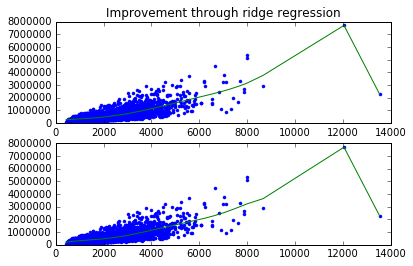

In [58]:
plt.subplot(2, 1, 1)
plt.plot(poly15_data1['power_1'], poly15_data1['price'], '.'
    , poly15_data1['power_1'], model15_set1.predict(graphlab.SFrame(poly15_data1)),'-')
plt.title('Improvement through ridge regression')


plt.subplot(2, 1, 2)
plt.plot(poly15_data_set1['power_1'], house_data_set1['price'], '.'
    , poly15_data_set1['power_1'], model15_ridge_set1.predict(poly15_data_set1),'-')


In [59]:
poly15_data_set2 = polynomial_dataframe(house_data_set2['sqft_living'], 15)
model15_ridge_set2 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model15_ridge_set2.fit(poly15_data_set2, house_data_set2['price'])	

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [61]:
poly15_data_set3 = polynomial_dataframe(house_data_set3['sqft_living'], 15)
model15_ridge_set3 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model15_ridge_set3.fit(poly15_data_set3, house_data_set3['price'])	

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [62]:
poly15_data_set4 = polynomial_dataframe(house_data_set4['sqft_living'], 15)
model15_ridge_set4 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model15_ridge_set4.fit(poly15_data_set4, house_data_set4['price'])	

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [63]:
model15_ridge_set1.coef_

array([  5.44669404e+02,  -3.55447611e-01,   1.22446384e-04,
        -1.17175321e-08,  -3.90512405e-13,  -1.39076243e-17,
         1.47860291e-20,   6.87491813e-25,  -7.57203965e-29,
        -1.04097309e-32,  -3.71844072e-37,   3.39989309e-41,
         5.56592047e-45,   2.53761318e-49,  -3.35152886e-53])

In [64]:
model15_ridge_set2.coef_

array([  8.59362630e+02,  -8.18118255e-01,   4.28879970e-04,
        -9.12770621e-08,  -2.69604478e-12,   3.73980313e-15,
        -1.42711892e-19,  -6.30794735e-23,  -1.44559538e-27,
         7.44321292e-31,   9.25865933e-35,   3.27990624e-41,
        -1.29543486e-42,  -1.38781259e-46,   1.66546441e-50])

In [65]:
model15_ridge_set3.coef_

array([ -7.55395899e+02,   9.75579464e-01,  -4.58945964e-04,
         7.77958005e-08,   7.15013468e-12,  -2.88601974e-15,
        -2.13678133e-20,   3.38085192e-23,   2.19178214e-27,
        -1.97067721e-31,  -4.15993171e-35,  -1.80196275e-39,
         3.19071177e-43,   5.08456999e-47,  -3.93304304e-51])

In [66]:
model15_ridge_set4.coef_

array([  1.11944572e+03,  -9.83760223e-01,   3.38770906e-04,
         3.60377158e-08,  -4.37813994e-11,   5.77191619e-15,
         7.66795337e-19,  -9.49297742e-23,  -1.96030818e-26,
        -2.10881067e-32,   3.31005072e-34,   3.47733861e-38,
        -2.43039197e-42,  -8.79553386e-46,   6.44569730e-50])

In [67]:
l2_large_penalty=1.23e2

In [68]:
model15_ridge_set4_large = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model15_ridge_set4_large.fit(poly15_data_set4, house_data_set4['price'])	

model15_ridge_set3_large = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model15_ridge_set3_large.fit(poly15_data_set3, house_data_set3['price'])	

model15_ridge_set2_large = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model15_ridge_set2_large.fit(poly15_data_set2, house_data_set2['price'])

model15_ridge_set1_large = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model15_ridge_set1_large.fit(poly15_data_set1, house_data_set1['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [69]:
model15_ridge_set1_large.coef_

array([  2.32806803e+00,   3.53621608e-04,   3.31969692e-08,
         2.00082477e-12,   1.11492559e-16,   6.57786122e-21,
         4.12939525e-25,   2.70393755e-29,   1.81614763e-33,
         1.23824277e-37,   8.51872481e-42,   5.89455598e-46,
         4.09542560e-50,   2.85464889e-54,   1.99547476e-58])

In [70]:
model15_ridge_set2_large.coef_

array([  2.09756903e+00,   3.90817483e-04,   6.67189944e-08,
         8.90002997e-12,   9.72639877e-16,   9.69733682e-20,
         9.50564475e-24,   9.44491031e-28,   9.57191338e-32,
         9.86945155e-36,   1.03101115e-39,   1.08729784e-43,
         1.15453748e-47,   1.23211305e-51,   1.31986696e-55])

In [71]:
model15_ridge_set3_large.coef_

array([  2.28906258e+00,   4.12472190e-04,   6.08835345e-08,
         6.58572163e-12,   6.15278155e-16,   5.64446634e-20,
         5.28834396e-24,   5.07091402e-28,   4.94657273e-32,
         4.88043809e-36,   4.85009106e-40,   4.84161534e-44,
         4.84635021e-48,   4.85883628e-52,   4.87558469e-56])

In [72]:
model15_ridge_set4_large.coef_

array([  2.08596194e+00,   4.05035772e-04,   7.46864647e-08,
         1.13096608e-11,   1.45864442e-15,   1.73561251e-19,
         2.01609632e-23,   2.34605255e-27,   2.75636073e-31,
         3.27043069e-35,   3.91046855e-39,   4.70118041e-43,
         5.67212304e-47,   6.85958087e-51,   8.30843630e-55])

In [73]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

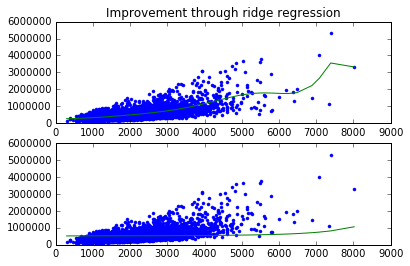

In [74]:
plt.subplot(2, 1, 1)
plt.plot(poly15_data4['power_1'], poly15_data4['price'], '.'
    , poly15_data4['power_1'], model15_set4.predict(graphlab.SFrame(poly15_data4)),'-')
plt.title('Improvement through ridge regression')


plt.subplot(2, 1, 2)
plt.plot(poly15_data_set4['power_1'], house_data_set4['price'], '.'
    , poly15_data_set4['power_1'], model15_ridge_set4_large.predict(poly15_data_set4),'-')


In [75]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [77]:
range(1,10)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [138]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    RSS = 0.0
    for i in range(0,k):
        n = len(data)
        start = (n*i)/10
        end = (n*(i+1))/10
        validation_set_input = data[start:end+1]
        validation_set_output = output[start:end+1]
        training_set_input = data[0:start].append(data[end+1:n])
        training_set_output = output[0:start].append(output[end+1:n])
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(training_set_input, training_set_output)
        predicted_output = model.predict(validation_set_input)
        RSS += ((predicted_output - validation_set_output)**2).sum()
    return RSS/float(k)

In [139]:
input_data = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
output_data = train_valid_shuffled['price']
l2_penalty =  np.logspace(3, 9, num=13)
RSS_l2 = []

In [140]:
print l2_penalty

[  1.00000000e+03   3.16227766e+03   1.00000000e+04   3.16227766e+04
   1.00000000e+05   3.16227766e+05   1.00000000e+06   3.16227766e+06
   1.00000000e+07   3.16227766e+07   1.00000000e+08   3.16227766e+08
   1.00000000e+09]


In [141]:
for i in range(0, len(l2_penalty)):
    RSS_l2.append(k_fold_cross_validation(10, i, input_data, output_data))
print RSS_l2

[2.8585383477248934e+19, 131826822246717.3, 151854965545818.94, 170034920468665.97, 184448623123929.62, 195543385285252.3, 204092808351911.8, 210756637901163.3, 216029019421062.4, 220267104281730.2, 223727424739194.44, 226595172568891.6, 229005339540684.6]


In [124]:
best_l2 = l2_penalty.take(np.argmin(RSS_l2))

In [125]:
best_l2

3162.2776601683795

In [127]:
house_data_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
1,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760.0,101930.0
2,9212900260,20140527T000000,468000.0,2.0,1.00,1160.0,6000,1,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330.0,6000.0
3,0114101516,20140528T000000,310000.0,3.0,1.00,1430.0,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780.0,12697.0
4,6054650070,20141007T000000,400000.0,3.0,1.75,1370.0,9680,1,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370.0,10208.0


In [128]:
poly15_train = polynomial_dataframe(house_data_train['sqft_living'], 15)
final_model = linear_model.Ridge(alpha=best_l2, normalize=True)
final_model.fit(poly15_train, house_data_train['price'])

Ridge(alpha=3162.2776601683795, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [129]:
poly15_test = polynomial_dataframe(house_data_test['sqft_living'], 15)
RSS_test = ((final_model.predict(poly15_test) - house_data_test['price'])**2).sum()
print RSS_test

2.84413196489e+14
